Create a file to open

In [1]:
import pandas as pd
import numpy as np
import random
import datetime

# Generate random data
n = 20  # Number of rows

ID = range(1, n + 1)
Name = random.choices(['Alice', 'Bob', 'Catherine', 'David', 'Emily'], k=n)
Age_Sex = [f"{random.randint(20, 40)}-{random.choice(['M', 'F'])}" for _ in range(n)]
Salary = [f"{random.choice(['$', ''])}{random.randint(40000, 80000)}" for _ in range(n)]
Address = [f"{random.choice(['Street', 'Avenue', 'Lane'])} {random.randint(1, 100)}, {random.choice(['NY', 'CA', 'TX'])}" for _ in range(n)]
Email = [f"{Name[i]}{random.choice(['.com', '', '.org'])}@{random.choice(['gmail', 'yahoo', 'hotmail'])}" for i in range(n)]
Date_Joined = [datetime.date(random.randint(2010, 2022), random.randint(1, 12), random.randint(1, 28)).strftime('%Y-%m-%d') for _ in range(n)]
Position_Level = [f"{random.choice(['Manager', 'Developer', 'Analyst'])}_{random.randint(1, 3)}" for _ in range(n)]
Phone = [random.choice(['123-456-7890', '(123) 456-7890', '1234567890']) for _ in range(n)]

# Create a DataFrame
df = pd.DataFrame({
    'ID': ID,
    'Name': Name,
    'Age_Sex': Age_Sex,
    'Salary': Salary,
    'Address': Address,
    'Email': Email,
    'Date_Joined': Date_Joined,
    'Position_Level': Position_Level,
    'Phone': Phone
})

# Introduce a variety of missing values
missing_values = [None, 'N/A', '--', 'na', '']
for col in ['Name', 'Age_Sex', 'Salary', 'Address', 'Email', 'Phone']:
    df.loc[random.sample(range(n), 3), col] = random.choices(missing_values, k=3)

# Save DataFrame as a CSV file with a custom delimiter (`;`)
df.to_csv('file.csv',index=False)


**Step 1** : Import the data and perform basic exploration.

Forget we already have a df, read 'file.csv' into dataframe df.

Explore the data

In [2]:
df = pd.read_csv("file.csv")
df

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
0,1,David,28-M,54116,"Street 99, CA",na,2015-01-28,Developer_1,NaN
1,2,Alice,34-F,74448,"Avenue 17, NY",Alice@hotmail,2012-08-25,Analyst_3,NaN
2,3,Alice,40-M,$55303,"Lane 7, TX",Alice@gmail,2021-04-16,Analyst_2,na
3,4,--,NaN,77136,"Street 76, NY",David@gmail,2020-05-22,Developer_1,1234567890
4,5,Bob,30-M,65824,"Avenue 10, TX",Bob.org@yahoo,2021-04-25,Analyst_1,123-456-7890
5,6,Bob,31-M,58067,"Lane 79, CA",Bob.org@yahoo,2017-01-23,Analyst_3,1234567890
6,7,Emily,20-F,$52132,"Lane 10, TX",Emily.com@hotmail,2017-09-27,Manager_3,1234567890
7,8,Alice,28-F,$61647,--,Alice@hotmail,2021-05-15,Analyst_3,123-456-7890
8,9,NaN,23-M,$65470,"Lane 75, TX",--,2010-05-28,Manager_3,(123) 456-7890
9,10,Bob,20-M,79559,"Lane 55, CA",Bob.org@gmail,2014-08-24,Analyst_1,123-456-7890


We need to find any discrepancies by doing exploratory data analysis.


1.   Find dimension of data
2.   Look at the first and last 5 rows

What do we see?



In [3]:
df.shape

(20, 9)

In [4]:
df.dtypes

ID                 int64
Name              object
Age_Sex           object
Salary            object
Address           object
Email             object
Date_Joined       object
Position_Level    object
Phone             object
dtype: object

In [5]:
df.head()

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
0,1,David,28-M,54116,"Street 99, CA",na,2015-01-28,Developer_1,NaN
1,2,Alice,34-F,74448,"Avenue 17, NY",Alice@hotmail,2012-08-25,Analyst_3,NaN
2,3,Alice,40-M,$55303,"Lane 7, TX",Alice@gmail,2021-04-16,Analyst_2,na
3,4,--,NaN,77136,"Street 76, NY",David@gmail,2020-05-22,Developer_1,1234567890
4,5,Bob,30-M,65824,"Avenue 10, TX",Bob.org@yahoo,2021-04-25,Analyst_1,123-456-7890


In [6]:
df.tail()

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
15,16,Emily,29-M,46559,na,Emily.org@yahoo,2015-11-09,Manager_1,123-456-7890
16,17,David,23-F,NaN,--,David.org@hotmail,2012-04-11,Developer_2,123-456-7890
17,18,Emily,--,$47200,"Street 94, NY",Emily.com@yahoo,2017-06-28,Manager_1,1234567890
18,19,Bob,28-F,71598,"Street 8, TX",--,2014-09-02,Manager_1,1234567890
19,20,NaN,37-F,$77577,"Lane 2, NY",Bob.org@yahoo,2021-09-18,Manager_1,(123) 456-7890


Some problems we can balleye from the data :


1.   Columns combined together with Mixed data types. Ex- Age and Sex
2.   Salary column and Phone Number columns
3.   Different kinds of missing values. Ex - N/A, na,-





Step 2 Before we solve the issues we need to chane all invalid/missing values to NaN

In [7]:
missing_value_types = [None, 'N/A', '--', 'na', '',np.NaN]
print(df.isin(missing_value_types).sum())

ID                0
Name              3
Age_Sex           3
Salary            3
Address           3
Email             3
Date_Joined       0
Position_Level    0
Phone             3
dtype: int64


Visualizing Missing Data

Optionally, use a library like Seaborn to create a heatmap of missing values.

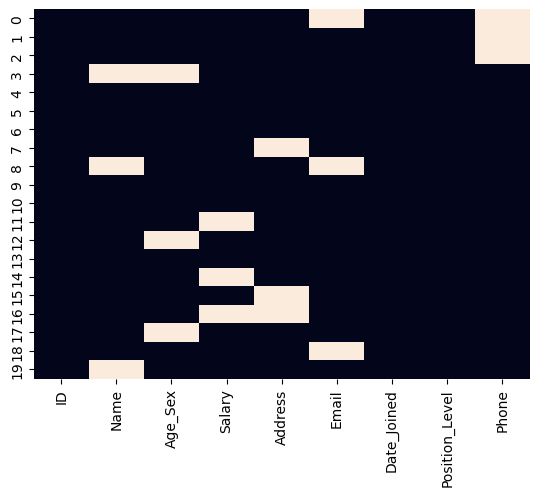

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isin(missing_value_types), cbar=False)
plt.show()


Change all to 'NaN'

In [9]:
import numpy as np
df.replace([None, 'N/A', '--', 'na', ''],np.nan, inplace=True)
df.head()

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
0,1,David,28-M,54116,"Street 99, CA",NaN,2015-01-28,Developer_1,NaN
1,2,Alice,34-F,74448,"Avenue 17, NY",Alice@hotmail,2012-08-25,Analyst_3,NaN
2,3,Alice,40-M,$55303,"Lane 7, TX",Alice@gmail,2021-04-16,Analyst_2,NaN
3,4,NaN,NaN,77136,"Street 76, NY",David@gmail,2020-05-22,Developer_1,1234567890
4,5,Bob,30-M,65824,"Avenue 10, TX",Bob.org@yahoo,2021-04-25,Analyst_1,123-456-7890


In [10]:
df.dtypes

ID                 int64
Name              object
Age_Sex           object
Salary            object
Address           object
Email             object
Date_Joined       object
Position_Level    object
Phone             object
dtype: object

**Step 2** : Solve the issues

1. Split Age and Sex

In [11]:
df[['Age','Sex']] = df['Age_Sex'].str.split('-', expand=True)
df.drop('Age_Sex', axis=1, inplace=True)
df

,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,David,54116,"Street 99, CA",NaN,2015-01-28,Developer_1,NaN,28,M
1,2,Alice,74448,"Avenue 17, NY",Alice@hotmail,2012-08-25,Analyst_3,NaN,34,F
2,3,Alice,$55303,"Lane 7, TX",Alice@gmail,2021-04-16,Analyst_2,NaN,40,M
3,4,NaN,77136,"Street 76, NY",David@gmail,2020-05-22,Developer_1,1234567890,NaN,NaN
4,5,Bob,65824,"Avenue 10, TX",Bob.org@yahoo,2021-04-25,Analyst_1,123-456-7890,30,M
5,6,Bob,58067,"Lane 79, CA",Bob.org@yahoo,2017-01-23,Analyst_3,1234567890,31,M
6,7,Emily,$52132,"Lane 10, TX",Emily.com@hotmail,2017-09-27,Manager_3,1234567890,20,F
7,8,Alice,$61647,NaN,Alice@hotmail,2021-05-15,Analyst_3,123-456-7890,28,F
8,9,NaN,$65470,"Lane 75, TX",NaN,2010-05-28,Manager_3,(123) 456-7890,23,M
9,10,Bob,79559,"Lane 55, CA",Bob.org@gmail,2014-08-24,Analyst_1,123-456-7890,20,M


We also need to change age to int datatype.

In [12]:
df.dropna(subset=['Age'], inplace=True)
df['Age'] = df['Age'].astype(int)
df

,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,David,54116,"Street 99, CA",NaN,2015-01-28,Developer_1,NaN,28,M
1,2,Alice,74448,"Avenue 17, NY",Alice@hotmail,2012-08-25,Analyst_3,NaN,34,F
2,3,Alice,$55303,"Lane 7, TX",Alice@gmail,2021-04-16,Analyst_2,NaN,40,M
4,5,Bob,65824,"Avenue 10, TX",Bob.org@yahoo,2021-04-25,Analyst_1,123-456-7890,30,M
5,6,Bob,58067,"Lane 79, CA",Bob.org@yahoo,2017-01-23,Analyst_3,1234567890,31,M
6,7,Emily,$52132,"Lane 10, TX",Emily.com@hotmail,2017-09-27,Manager_3,1234567890,20,F
7,8,Alice,$61647,NaN,Alice@hotmail,2021-05-15,Analyst_3,123-456-7890,28,F
8,9,NaN,$65470,"Lane 75, TX",NaN,2010-05-28,Manager_3,(123) 456-7890,23,M
9,10,Bob,79559,"Lane 55, CA",Bob.org@gmail,2014-08-24,Analyst_1,123-456-7890,20,M
10,11,David,$78284,"Street 45, NY",David.com@hotmail,2018-04-13,Developer_2,(123) 456-7890,36,M


2. Solve Salary Issue

Remove '$' and convert to int

In [13]:
df

,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,David,54116,"Street 99, CA",NaN,2015-01-28,Developer_1,NaN,28,M
1,2,Alice,74448,"Avenue 17, NY",Alice@hotmail,2012-08-25,Analyst_3,NaN,34,F
2,3,Alice,$55303,"Lane 7, TX",Alice@gmail,2021-04-16,Analyst_2,NaN,40,M
4,5,Bob,65824,"Avenue 10, TX",Bob.org@yahoo,2021-04-25,Analyst_1,123-456-7890,30,M
5,6,Bob,58067,"Lane 79, CA",Bob.org@yahoo,2017-01-23,Analyst_3,1234567890,31,M
6,7,Emily,$52132,"Lane 10, TX",Emily.com@hotmail,2017-09-27,Manager_3,1234567890,20,F
7,8,Alice,$61647,NaN,Alice@hotmail,2021-05-15,Analyst_3,123-456-7890,28,F
8,9,NaN,$65470,"Lane 75, TX",NaN,2010-05-28,Manager_3,(123) 456-7890,23,M
9,10,Bob,79559,"Lane 55, CA",Bob.org@gmail,2014-08-24,Analyst_1,123-456-7890,20,M
10,11,David,$78284,"Street 45, NY",David.com@hotmail,2018-04-13,Developer_2,(123) 456-7890,36,M


In [14]:
df['Salary'] = df['Salary'].str.replace('$', '')
# df['Salary'].fillna(-1, inplace=True)
# df['Salary'] = df['Salary'].astype(int)
# df.head()

<ipython-input-14-644ab0f73a42>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace('$', '')


3. Standardize Phone Number Column

In [18]:
df['Phone'] = df['Phone'].str.replace(r'\D', '').str.slice(-10)
df.head()

<ipython-input-18-e24a01a45ceb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phone'] = df['Phone'].str.replace(r'\D', '').str.slice(-10)


,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,Bob,44399,"Lane 16, NY",Bob@hotmail,2021-04-20,Analyst_1,1234567890,20,M
1,2,Alice,79337,"Avenue 32, CA",Alice@gmail,2020-02-26,Analyst_1,NaN,26,F
2,3,Catherine,-1,"Street 77, TX",Catherine.com@yahoo,2016-05-02,Analyst_1,NaN,38,M
3,4,Alice,64936,"Avenue 96, TX",Alice.com@gmail,2022-04-21,Developer_2,1234567890,29,F
4,5,NaN,-1,"Avenue 42, CA",David.org@yahoo,2011-07-08,Manager_1,1234567890,28,F


4. Reorder the columns

In [19]:
# Reorder columns for better readability
df = df[['Name', 'Sex', 'Age', 'Phone', 'Position_Level', 'Salary']]
df.head()

,Name,Sex,Age,Phone,Position_Level,Salary
0,Bob,M,20,1234567890,Analyst_1,44399
1,Alice,F,26,NaN,Analyst_1,79337
2,Catherine,M,38,NaN,Analyst_1,-1
3,Alice,F,29,1234567890,Developer_2,64936
4,NaN,F,28,1234567890,Manager_1,-1


Change categorical data

In [20]:
df['Sex'] = df['Sex'].astype('category')
df['Gender_code'] = df['Sex'].cat.codes
df.head()

<ipython-input-20-0257f43e8c6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].astype('category')
<ipython-input-20-0257f43e8c6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_code'] = df['Sex'].cat.codes


,Name,Sex,Age,Phone,Position_Level,Salary,Gender_code
0,Bob,M,20,1234567890,Analyst_1,44399,1
1,Alice,F,26,NaN,Analyst_1,79337,0
2,Catherine,M,38,NaN,Analyst_1,-1,1
3,Alice,F,29,1234567890,Developer_2,64936,0
4,NaN,F,28,1234567890,Manager_1,-1,0


Step 4 Dealing with outliers

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 18
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Name            15 non-null     object  
 1   Sex             17 non-null     category
 2   Age             17 non-null     int64   
 3   Phone           14 non-null     object  
 4   Position_Level  17 non-null     object  
 5   Salary          17 non-null     int64   
 6   Gender_code     17 non-null     int8    
dtypes: category(1), int64(2), int8(1), object(3)
memory usage: 974.0+ bytes


In [ ]:
df.describe()

,Age,Salary,Gender_code
count,17.000000,17.000000,17.000000
mean,28.647059,50815.823529,0.470588
std,6.900554,26865.473396,0.514496
min,20.000000,-1.000000,0.000000
25%,22.000000,42730.000000,0.000000
50%,27.000000,59618.000000,0.000000
75%,36.000000,66587.000000,1.000000
max,39.000000,78394.000000,1.000000


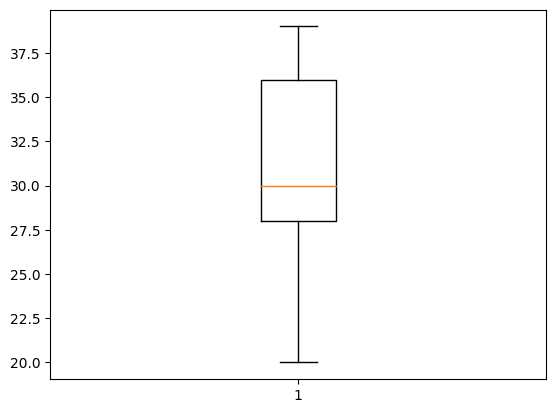

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()


In [23]:
from scipy import stats
z_scores = stats.zscore(df['Age'])
z_scores

0    -1.911031
1    -0.840014
2     1.302021
3    -0.304505
4    -0.483008
5    -0.304505
6    -0.304505
8     0.945015
9     1.123518
10   -1.375522
11   -1.375522
12    0.052501
13    0.052501
15    0.766512
17    1.480524
18    1.302021
19   -0.126002
Name: Age, dtype: float64

In [24]:
df = df[(z_scores < 3) & (z_scores > -3)] #Remove Outliers
df

,Name,Sex,Age,Phone,Position_Level,Salary,Gender_code
0,Bob,M,20,1234567890,Analyst_1,44399,1
1,Alice,F,26,NaN,Analyst_1,79337,0
2,Catherine,M,38,NaN,Analyst_1,-1,1
3,Alice,F,29,1234567890,Developer_2,64936,0
4,NaN,F,28,1234567890,Manager_1,-1,0
5,Alice,M,29,1234567890,Analyst_1,50285,1
6,Emily,M,29,1234567890,Manager_2,57792,1
8,Alice,F,36,1234567890,Analyst_1,49565,0
9,Catherine,M,37,1234567890,Manager_3,-1,1
10,Catherine,M,23,1234567890,Analyst_1,71490,1


In [30]:
# df['Salary'].replace(-1, np.nan, inplace = True)
a =df['Salary'].fillna(df['Salary'].mean())
df.head()

,Name,Sex,Age,Phone,Position_Level,Salary,Gender_code
0,Bob,M,20,1234567890,Analyst_1,44399.000000,1
1,Alice,F,26,NaN,Analyst_1,79337.000000,0
2,Catherine,M,38,NaN,Analyst_1,61007.714286,1
3,Alice,F,29,1234567890,Developer_2,64936.000000,0
4,NaN,F,28,1234567890,Manager_1,61007.714286,0


In [31]:
print(a)

0     44399.000000
1     79337.000000
2     61007.714286
3     64936.000000
4     61007.714286
5     50285.000000
6     57792.000000
8     49565.000000
9     61007.714286
10    71490.000000
11    54849.000000
12    43853.000000
13    60584.000000
15    49315.000000
17    69956.000000
18    78073.000000
19    79674.000000
Name: Salary, dtype: float64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Name            16 non-null     object  
 1   Sex             17 non-null     category
 2   Age             17 non-null     int64   
 3   Phone           14 non-null     object  
 4   Position_Level  17 non-null     object  
 5   Salary          17 non-null     float64 
 6   Gender_code     17 non-null     int8    
dtypes: category(1), float64(1), int64(1), int8(1), object(3)
memory usage: 974.0+ bytes


Check with ASSERT statement

The assert statement in Python is a debugging aid that tests a condition and triggers an error if the condition is not met. When it comes to DataFrames in Pandas, you can use assertions to check for NaN (Not a Number) values in your data.

In [34]:
assert df.notna().all().all()


In [33]:
df.dropna(inplace = True)
df

,Name,Sex,Age,Phone,Position_Level,Salary,Gender_code
0,Bob,M,20,1234567890,Analyst_1,44399.000000,1
3,Alice,F,29,1234567890,Developer_2,64936.000000,0
5,Alice,M,29,1234567890,Analyst_1,50285.000000,1
6,Emily,M,29,1234567890,Manager_2,57792.000000,1
8,Alice,F,36,1234567890,Analyst_1,49565.000000,0
9,Catherine,M,37,1234567890,Manager_3,61007.714286,1
10,Catherine,M,23,1234567890,Analyst_1,71490.000000,1
11,Emily,M,23,1234567890,Developer_2,54849.000000,1
12,Bob,M,31,1234567890,Manager_2,43853.000000,1
13,Alice,F,31,1234567890,Developer_3,60584.000000,0


Save data as JSON

In [35]:
df.to_json('data.json', orient='split', index=False)


In [36]:
import json


with open('data.json', 'r') as f:
    data = json.load(f)


print(data['columns'])
for row in data['data']:
  print(row)


['Name', 'Sex', 'Age', 'Phone', 'Position_Level', 'Salary', 'Gender_code']
['Bob', 'M', 20, '1234567890', 'Analyst_1', 44399.0, 1]
['Alice', 'F', 29, '1234567890', 'Developer_2', 64936.0, 0]
['Alice', 'M', 29, '1234567890', 'Analyst_1', 50285.0, 1]
['Emily', 'M', 29, '1234567890', 'Manager_2', 57792.0, 1]
['Alice', 'F', 36, '1234567890', 'Analyst_1', 49565.0, 0]
['Catherine', 'M', 37, '1234567890', 'Manager_3', 61007.7142857143, 1]
['Catherine', 'M', 23, '1234567890', 'Analyst_1', 71490.0, 1]
['Emily', 'M', 23, '1234567890', 'Developer_2', 54849.0, 1]
['Bob', 'M', 31, '1234567890', 'Manager_2', 43853.0, 1]
['Alice', 'F', 31, '1234567890', 'Developer_3', 60584.0, 0]
['Emily', 'F', 35, '1234567890', 'Analyst_3', 49315.0, 0]
['Catherine', 'M', 39, '1234567890', 'Analyst_1', 69956.0, 1]
['Alice', 'F', 38, '1234567890', 'Manager_2', 78073.0, 0]


In [37]:
df.to_json('data.json', orient='records')

with open('data.json', 'r') as f:
    data = json.load(f)
    j_string = json.dumps(data)
print(j_string)

[{"Name": "Bob", "Sex": "M", "Age": 20, "Phone": "1234567890", "Position_Level": "Analyst_1", "Salary": 44399.0, "Gender_code": 1}, {"Name": "Alice", "Sex": "F", "Age": 29, "Phone": "1234567890", "Position_Level": "Developer_2", "Salary": 64936.0, "Gender_code": 0}, {"Name": "Alice", "Sex": "M", "Age": 29, "Phone": "1234567890", "Position_Level": "Analyst_1", "Salary": 50285.0, "Gender_code": 1}, {"Name": "Emily", "Sex": "M", "Age": 29, "Phone": "1234567890", "Position_Level": "Manager_2", "Salary": 57792.0, "Gender_code": 1}, {"Name": "Alice", "Sex": "F", "Age": 36, "Phone": "1234567890", "Position_Level": "Analyst_1", "Salary": 49565.0, "Gender_code": 0}, {"Name": "Catherine", "Sex": "M", "Age": 37, "Phone": "1234567890", "Position_Level": "Manager_3", "Salary": 61007.7142857143, "Gender_code": 1}, {"Name": "Catherine", "Sex": "M", "Age": 23, "Phone": "1234567890", "Position_Level": "Analyst_1", "Salary": 71490.0, "Gender_code": 1}, {"Name": "Emily", "Sex": "M", "Age": 23, "Phone": "



```
Write a function that will take a json string like the above as a parameter, returning a pandas Series with the name as the index and the age as a value.
```



In [ ]:


def create_series_from_json(json_string):
    # Load the JSON string into a Python object
    json_data = json.loads(json_string)
    print(json_data)
    # Convert the Python object to a DataFrame
    df = pd.DataFrame(json_data)

    # Create Series with 'Name' as index and 'Age' as values
    series = pd.Series(df['Age'].values, index=df['Name'])

    return series


result_series = create_series_from_json(j_string)
print(result_series)




```
Calculate Average Salary: Write a function to calculate and return the average salary for a given Position_Level.
```




In [44]:
data = {
    'Name': ['Emily', 'David', 'Alice', 'John'],
    'Position_Level': ['Analyst_1', 'Analyst_1', 'Manager_2', 'Developer_3'],
    'Salary': [62229, 74698, 45774, 48243]
}
df = pd.DataFrame(data)

print(df)
def calculate_average_salary(df, position_level):
    # Filter the DataFrame to only include rows with the given Position_Level
    filtered_df = df[df['Position_Level'] == position_level]
    print(filtered_df)
    # Calculate the average salary for the filtered DataFrame
    avg_salary = filtered_df['Salary'].mean()

    return avg_salary



position_level = 'Analyst_1'
avg_salary = calculate_average_salary(df, position_level)
print(f"The average salary for {position_level} is {avg_salary}")


    Name Position_Level  Salary
0  Emily      Analyst_1   62229
1  David      Analyst_1   74698
2  Alice      Manager_2   45774
3   John    Developer_3   48243
    Name Position_Level  Salary
0  Emily      Analyst_1   62229
1  David      Analyst_1   74698
The average salary for Analyst_1 is 68463.5




```
Age Groups: Write a function that categorizes people into age groups ('Young', 'Adult', 'Senior') and returns the DataFrame with a new column named Age_Group.
```



In [45]:
data = {
    'Name': ['Emily', 'David', 'Alice', 'John'],
    'Age': [27, 31, 55, 16],
    'Position_Level': ['Analyst_1', 'Analyst_1', 'Manager_2', 'Developer_3'],
    'Salary': [62229, 74698, 45774, 48243]
}
df = pd.DataFrame(data)


def categorize_age_groups(df):
    # Define the age bins and labels
    bins = [0, 18, 35, float('inf')]
    labels = ['Young', 'Adult', 'Senior']

    # Create a new column 'Age_Group'
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

    return df





df = categorize_age_groups(df)
print(df)


    Name  Age Position_Level  Salary Age_Group
0  Emily   27      Analyst_1   62229     Adult
1  David   31      Analyst_1   74698     Adult
2  Alice   55      Manager_2   45774    Senior
3   John   16    Developer_3   48243     Young
